## **NOC Near-Present Day Hackathon - Day 1**
### Tutorial 1. Getting Started with OceanDataStore

#### **Contact:**
Ollie Tooth (oliver.tooth@noc.ac.uk)

#### **Background:**
---

**OceanDataStore** is a Python library designed to streamline writing and accessing ocean model and observational data stored in the cloud.

In this first hands-on tutorial, we will demonstrate how to use the **OceanDataCatalog** API to explore the [**Near-Present-Day**](https://noc-msm.github.io/NOC_Near_Present_Day/) global ocean sea-ice simulations developed by the National Oceanography Centre as part of the Atlantic Climate and Environment Strategic Science ([**AtlantiS**](https://noc.ac.uk/projects/atlantis)) programme.

We will cover:

* How to use the **OceanDataCatalog** to explore Spatio-Temporal Access Catalogs ([**STAC**](https://stacspec.org/en)) exposing available collections of ocean model & observational data stored in the JASMIN Object Store.

* How to search the **OceanDataCatalog** by collection, variable name, standard name or platform.

* How to open and subset Analysis-Ready Cloud-Optimised ([**ARCO**](https://doi.org/10.1109/MCSE.2021.3059437)) datasets as lazy [**xarray**](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) Datasets.

#### **1.1 Basics**
---

* Let's begin by importing the **OceanDataCatalog** class from the **OceanDataStore** Python library:

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from OceanDataStore import OceanDataCatalog

* Next, we need to create an instance of the **OceanDataCatalog** class to access the NOC ocean modelling Spatio-Temporal Access Catalog (**STAC**) named `noc-model-stac`:

**Note that we have also provided a local copy of the `noc-model-stac` on both NOC Data Science Platforms at `/groups/npd-workshop/noc-model-stac`** 

In [2]:
# Initialising the OceanDataCatalog using the `noc-model-stac` stored in the JASMIN cloud object store:
catalog = OceanDataCatalog(catalog_name="noc-model-stac")

# Alternative: Initialising the OceanDataCatalog using the `noc-model-stac` stored locally:
# catalog = OceanDataCatalog(catalog_url="/groups/npd-workshop/noc-model-stac/catalog.json")

* We can use the `available_collections` property to return the names (**IDs**) of all available dataset collections in the `noc-model-stac`:

In [3]:
catalog.available_collections

['noc-rapid-evolution', 'noc-npd-jra55', 'noc-npd-era5']

* Above, we can see three available collections corresponding to:

    * Nested 1/4° (nominal horizontal resolution) global forced ocean sea-ice simulation performed for the CCROC [**RAPID-Evolution**](https://noc.ac.uk/projects/rapid-evolution) project.

    * 1° & 1/4° global ocean sea-ice simulations of the NOC Near-Present Day JRA55-do collection (1976-2023).

    * 1°, 1/4° & 1/12 ° global ocean sea ice simulation of the NOC Near-Present Day ERA-5 collection (1976-present).

* Throughout the hackathon, we'll be focusing our analysis on the latest Near-Present Day ERA-5 collection since this will be continually updated to the near-present.

* Now, let's use the `.search()` method to search the Near-Present Day ERA-5 collection for all ocean model outputs including the sea surface temperature (SST) standard variable name.

---

`search()`
* We can search the root **Catalog** using any combination of the following parameters:

    * `collection` : Activity **Collection** name (e.g., `noc-npd-era5`).

    * `platform` : Platform **Catalog** name (e.g., `gn`).

    * `variable_name` : Variable name contained in **Item** **Asset** (e.g., `tos_con`).

    * `standard_name` : Standard variable name contained in **Item** **Asset** (e.g., `sea_surface_temperature`).

    * `item_name` : Substring to filter Item IDs (e.g., `domain`).

---

In [4]:
catalog.search(collection='noc-npd-era5', standard_name='sea_surface_temperature')


            * Item ID: noc-npd-era5/npd-eorca1-era5v1/gn/T1y
              Title: eORCA1 ERA5v1 NPD T1y Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean physics annual mean outputs defined at T-points.
              Platform: gn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca1-era5v1/gn/T1m
              Title: eORCA1 ERA5v1 NPD T1m Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean physics monthly mean outputs defined at T-points.
              Platform: gn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca025-era5v1/gn/T1y_3d
              Title: eORCA025 ERA5v1 NPD T1y_3d Icechunk repository
              Description: Icechunk repository containing eORCA025 ERA5v1 

* The `search` operation returns a summary of every STAC Item which meets the criteria of our search, in this case containing a variable with the CF-compliant standard name `sea_surface_temperature`.

* Once we have performed a `search` operation on our catalog, we can also use the `available_items` property to return the names (**IDs**) of the available STAC Items resulting from our search.

In [5]:
catalog.available_items

['noc-npd-era5/npd-eorca1-era5v1/gn/T1y',
 'noc-npd-era5/npd-eorca1-era5v1/gn/T1m',
 'noc-npd-era5/npd-eorca025-era5v1/gn/T1y_3d',
 'noc-npd-era5/npd-eorca025-era5v1/gn/T1m_3d',
 'noc-npd-era5/npd-eorca025-era5v1/gn/T5d_3d',
 'noc-npd-era5/npd-eorca12-era5v1/gn/T1y_3d',
 'noc-npd-era5/npd-eorca12-era5v1/gn/T1m_3d',
 'noc-npd-era5/npd-eorca12-era5v1/gn/T5d_3d']

**Note that each time we perform a `search` the `available_items` property of our `catalog` will be updated to reflect the results of our latest search.**

* Now, let's take a closer look at the first Item in our search results. This corresponds to the annual-mean T-grid variables (`T1y`) output by the 1° NPD eORCA1 ERA5v1 simulation (`npd-eorca1-era5v1`) stored on their native NEMO model grid (`gn`).

* By looking under the `properties/variable_standard_names` tab, we can see that `sea_surface_temperature` is the 64th variable in this dataset and is named `tos_con` (see `properties/variables` tab).

In [6]:
catalog.Items[0]

<Item id=noc-npd-era5/npd-eorca1-era5v1/gn/T1y>

* Next, let's open a subset (1980-1990) of the annual-mean SST data as an `xarray.Dataset` by using the `.open_dataset()` method.

---

`open_dataset()`
* We can open the **Asset** associated with a given STAC *Items* ID as a lazy `xarray.Dataset` by passing the following arguments to the `.open_dataset()` method:

    * `id` : Identifier of STAC *Items* (e.g., `noc-npd-era5/npd-eorca1-era5v1/gn/T1y`).

    * `variable_names` : List of variable names to be parsed from the dataset (e.g., `['tos_con', 'sos_abs']`). Default is to return all variables.

    * `start_datetime` : Start datetime used to subset the dataset. Should be a string in ISO format (e.g., `"1976-01-01T00:00:00Z"`). Default is to use the *Items* start_datetime.

    * `end_datetime` : End datetime used to subset the dataset. Should be a string in ISO format (e.g., `"2024-12-31T00:00:00Z"`). Default is to use the *Items* end_datetime.

    * `bbox` : Spatial bounding box used to subset the dataset. Should be a list of four floats representing the bounding box in the format: (min_lon, min_lat, max_lon, max_lat). Default is to use the *Items* bbox.

---

* Here, we use the `.id` attribute of the first *Items* returned by our latest search and pass datetime strings (in the format 'YYYY-MM') to the `start_datetime` and `end_datetime` arguments.

In [7]:
ds = catalog.open_dataset(id=catalog.Items[0].id,
                          start_datetime='1980-01',
                          end_datetime='1990-12',
                          )

ds

  2026-01-18T21:29:53.049744Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorError { kind: Timeout, source: hyper_util::client::legacy::Error(Connect, HttpTimeoutError { kind: "HTTP connect", duration: 1s }), connection: Unknown } }) }))
    at /Users/runner/miniforge3/conda-bld/icechunk_1767037408716/_build_env/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/aws-config-1.8.12/src/imds/region.rs:66



<xarray.Dataset> Size: 9GB
Dimensions:                (time_counter: 11, y: 331, x: 360, deptht: 75,
                            axis_nbounds: 2)
Coordinates:
  * time_counter           (time_counter) datetime64[ns] 88B 1980-07-02 ... 1...
  * deptht                 (deptht) float32 300B 0.5058 1.556 ... 5.902e+03
    nav_lat                (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    nav_lon                (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered          (time_counter) datetime64[ns] 88B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/74)
    berg_latent_heat_flux  (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    evs                    (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    e3t                    (time_counter, deptht, y, x) float32 393MB dask.array<chunksize=(1, 25, 331, 360), meta=np.ndarray>
    empmr                  (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    hfds                   (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    fsitherm               (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    ...                     ...
    vowflisf               (time_counter, deptht, y, x) float32 393MB dask.array<chunksize=(1, 25, 331, 360), meta=np.ndarray>
    zos                    (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    ttrd_bbl_li            (time_counter, deptht, y, x) float32 393MB dask.array<chunksize=(1, 25, 331, 360), meta=np.ndarray>
    vohfcisf               (time_counter, deptht, y, x) float32 393MB dask.array<chunksize=(1, 25, 331, 360), meta=np.ndarray>
    vohflisf               (time_counter, deptht, y, x) float32 393MB dask.array<chunksize=(1, 25, 331, 360), meta=np.ndarray>
    zossq                  (time_counter, y, x) float32 5MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>

**Note that the warning `WARN aws_config::imds::region: failed to load region...` is expected as the JASMIN cloud object store is not an Amazon Web Services (AWS) S3 object store and hence does not use regions.**

* The resulting `xarray.Dataset` is lazy, meaning that we have not yet downloaded any data (besided the metadata shown) from the JASMIN cloud object store.

* As a quick sense check, let's create a plot of the time-mean (1980-1990) SST for the global ocean.

* To do this, we use `.mean(dim='time_counter')` to tell `xarray` to compute the average over the entire time-dimension and `.plot(cmap='RdBu_r')` to create a colormesh plot using a basic Blue-Red colormap.

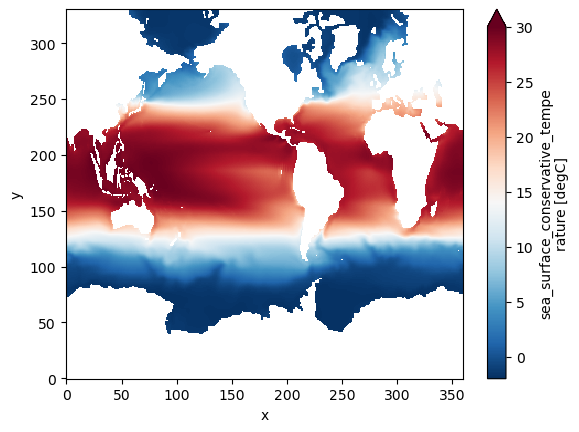

In [22]:
ds['tos_con'].mean(dim='time_counter').plot(cmap='RdBu_r', vmin=-2, vmax=30, shading='auto')

* Notice that the sea surface temperature field is plotted as a function of the grid indexes `y` and `x` rather than latitude and longitude; this is because NEMO uses curvilinear rather than regular grids.

* Let's create a **geographical plot** of the same sea surface temperature field:

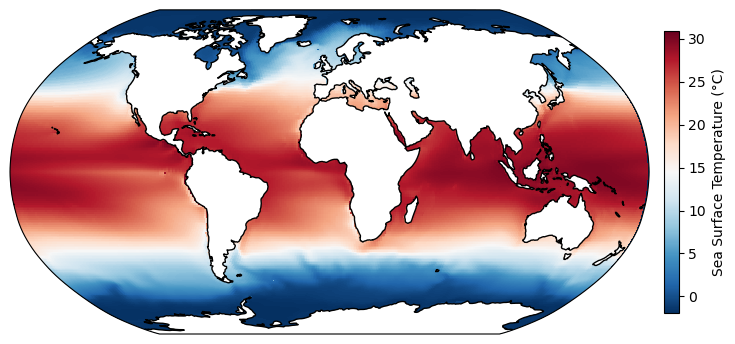

In [23]:
# Define figure and axes using Robinson projection:
fig, ax = plt.subplots(
    figsize=(8, 5),
    subplot_kw={"projection": ccrs.Robinson()}
)

# Plot time-mean sea surface temperature:
mesh = ax.pcolormesh(
    ds['nav_lon'],
    ds['nav_lat'],
    ds['tos_con'].mean(dim='time_counter'),
    transform=ccrs.PlateCarree(central_longitude=-1.0), # Add a small offset to prevent striping.
    shading="auto",
    cmap="RdBu_r",
    zorder=0,
)

# Add land & coastlines features:
ax.coastlines(resolution="110m", linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="white", zorder=1)

# Add colorbar:
cbar = plt.colorbar(mesh, ax=ax, orientation="vertical", pad=0.02, shrink=0.6)
cbar.set_label("Sea Surface Temperature (°C)")

plt.tight_layout()
plt.show()

#### **1.2 Ocean Model Domain Variables**
---

* So far, we have seen how to access NPD ocean model variables (e.g., temperature, salinity and velocities) defined on their native NEMO model grid.

* But often when calculating diagnostics derived from these variables, such as volume transports and spatial-averages, we also need to access the variables describing the ocean model domain.

* Let's next search the `OceanDataCatalog` for any *Items* which contains **"domain_cfg"** in the *Item* ID:

In [13]:
catalog.search(collection='noc-npd-era5', item_name='domain_cfg')


            * Item ID: noc-npd-era5/npd-eorca1-era5v1/gn/domain/domain_cfg
              Title: eORCA1 ERA5v1 NPD domain/domain_cfg Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean model domain and mesh mask variables.
              Platform: gn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca025-era5v1/gn/domain/domain_cfg
              Title: eORCA025 ERA5v1 NPD domain/domain_cfg Icechunk repository
              Description: Icechunk repository containing eORCA025 ERA5v1 NPD global ocean model domain and mesh mask variables.
              Platform: gn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca12-era5v1/gn/domain/domain_cfg
              Title: eORCA12 ERA5v1 NPD domain/domain_cfg Icechunk repository
              D

* We can see from the list of search *Items* that `domain_cfg` ancillary datasets are available for each NPD model configuration.

* Next, let's open the `domain_cfg` file for the 1° NPD eORCA1 ERA5v1 simulation we explored earlier. 

In [14]:
ds_domain_cfg = catalog.open_dataset(id="noc-npd-era5/npd-eorca1-era5v1/gn/domain/domain_cfg")

ds_domain_cfg

  2026-01-18T21:32:34.355753Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorError { kind: Timeout, source: hyper_util::client::legacy::Error(Connect, HttpTimeoutError { kind: "HTTP connect", duration: 1s }), connection: Unknown } }) }))
    at /Users/runner/miniforge3/conda-bld/icechunk_1767037408716/_build_env/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/aws-config-1.8.12/src/imds/region.rs:66



<xarray.Dataset> Size: 710MB
Dimensions:       (y: 331, x: 360, nav_lev: 75)
Coordinates:
  * y             (y) int64 3kB 0 1 2 3 4 5 6 7 ... 324 325 326 327 328 329 330
  * x             (x) int64 3kB 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * nav_lev       (nav_lev) int64 600B 0 1 2 3 4 5 6 7 ... 68 69 70 71 72 73 74
Data variables: (12/49)
    atlmsk        (y, x) float32 477kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    e1f           (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    bottom_level  (y, x) int32 477kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    e2f           (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    bathy_metry   (y, x) float32 477kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    e1v           (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    ...            ...
    umaskutil     (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    wmask         (nav_lev, y, x) bool 9MB dask.array<chunksize=(75, 331, 360), meta=np.ndarray>
    socmsk        (y, x) float32 477kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    tmask         (nav_lev, y, x) int8 9MB dask.array<chunksize=(75, 331, 360), meta=np.ndarray>
    tmaskutil     (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    vmaskutil     (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>
Attributes:
    CfgName:    UNKNOWN
    CfgIndex:   -999
    Iperio:     1
    Jperio:     0
    NFold:      1
    NFtype:     F
    VertCoord:  zps
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  01/03/2025 22:19:49 -0000

#### **1.3 Pre-Calculated Diagnostics**
---

* In addition to variables output by our NEMO model, we can also access a range of pre-calculated diagnostics, such as the meridional overturning, heat and freshwater transports across the following trans-basin sections:

    - Overturning in the Subpolar North Atlantic Program (**OSNAP**) array
    - Rapid Climate Change-Meridional Overturning Circulation and Heatflux Array (**RAPID-MOCHA**) at 26.5°N
    - Meridional Overturning Variability Experiment (**MOVE**) array at 16°N
    - South Atlantic Meridional overturning circulation Basin-wide Array (**SAMBA**) array at 34.5°S

* The OSNAP section diagnostics are extracted using [**NEMO Cookbook**](https://noc-msm.github.io/nemo_cookbook/), we shall revisit this in Tutorial 2.

* The remaining diagnostics are calculated using the [**Meridional ovErTurning ciRculation diagnostIC (METRIC)**](https://github.com/AMOCcommunity/metric) package.

* Let's see how we can access these diagnostics by searching the `OceanDataCatalog` for any *Items* with identifiers containing the key word **"tn"**, which corresponds to transects which are defined on the native NEMO model grid:


In [12]:
catalog.search(collection='noc-npd-era5', item_name='tn')


            * Item ID: noc-npd-era5/npd-eorca1-era5v1/tn/M1m/MOVE_16N
              Title: eORCA1 ERA5v1 NPD M1m/MOVE_16N Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD ocean physics transect monthly mean outputs defined at MOVE_16N.
              Platform: tn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca1-era5v1/tn/M1m/SAMBA_34_5S
              Title: eORCA1 ERA5v1 NPD M1m/SAMBA_34_5S Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean scalar monthly mean outputs.
              Platform: tn
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2025-07-31T00:00:00Z
            

            * Item ID: noc-npd-era5/npd-eorca1-era5v1/tn/M1m/RAPID_26N
              Title: eORCA1 ERA5v1 NPD M1m/RAPID_26N Icechunk repository
              Description: Icechunk repo

* We can see from the list of search *Items* that `OSNAP`, `RAPID_26N`, `MOVE_16N` and `SAMBA_34_5S` diagnostics are available for all NPD model configurations.

* Next, let's open the monthly-mean `RAPID_26N` diagnostics for the 1° NPD eORCA1 ERA5v1 simulation. 

In [25]:
ds_rapid = catalog.open_dataset(id="noc-npd-era5/npd-eorca1-era5v1/tn/M1m/RAPID_26N")

ds_rapid

  2026-01-18T21:56:16.327694Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorError { kind: Timeout, source: hyper_util::client::legacy::Error(Connect, HttpTimeoutError { kind: "HTTP connect", duration: 1s }), connection: Unknown } }) }))
    at /Users/runner/miniforge3/conda-bld/icechunk_1767037408716/_build_env/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/aws-config-1.8.12/src/imds/region.rs:66



<xarray.Dataset> Size: 158MB
Dimensions:        (x: 71, z: 75, time: 595, xbounds: 72)
Coordinates:
  * x              (x) float64 568B -80.5 -79.5 -78.5 ... -12.5 -11.5 -10.5
  * z              (z) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2025-07-...
  * xbounds        (xbounds) float64 576B -81.0 -80.0 -79.0 ... -11.0 -9.998
Data variables: (12/62)
    dx             (x) float64 568B dask.array<chunksize=(71,), meta=np.ndarray>
    dz             (z) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>
    dh             (time, z, xbounds) float64 26MB dask.array<chunksize=(1, 75, 72), meta=np.ndarray>
    ekman          (time) float64 5kB dask.array<chunksize=(298,), meta=np.ndarray>
    fc             (time) float64 5kB dask.array<chunksize=(298,), meta=np.ndarray>
    fw_fc          (time) float64 5kB dask.array<chunksize=(298,), meta=np.ndarray>
    ...             ...
    v              (time, z, x) float64 25MB dask.array<chunksize=(1, 75, 71), meta=np.ndarray>
    v_basin_model  (time, z) float64 357kB dask.array<chunksize=(1, 75), meta=np.ndarray>
    v_fc           (time, z) float64 357kB dask.array<chunksize=(1, 75), meta=np.ndarray>
    vgeo           (time, z, x) float64 25MB dask.array<chunksize=(1, 75, 71), meta=np.ndarray>
    v_basin_rapid  (time, z) float64 357kB dask.array<chunksize=(1, 75), meta=np.ndarray>
    wbw            (time) float64 5kB dask.array<chunksize=(298,), meta=np.ndarray>

* The monthly-mean `RAPID_26N` diagnostics include the strength of the Atlantic Meridional Overturning Circulation (AMOC) at 26.5N evaluated directly from the model velocity fields (`moc_model`) and using an observational-equivalent method, including an end-point geostrophic calculation for the basin interior (`moc_rapid`).

* Finally, let's plot the time series of the monthly mean AMOC (vertical overturning) strength at 26.5N as simulated in the 1° NPD eORCA1 ERA5v1 simulation.

Text(0, 0.5, 'AMOC Strength (Sv)')

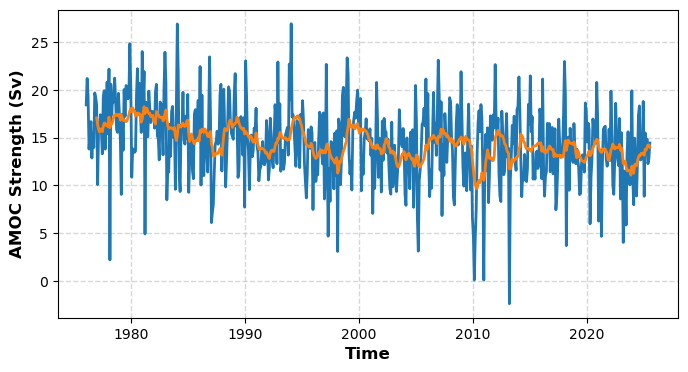

In [29]:
plt.figure(figsize=(8, 4))
plt.grid(True, linewidth=1, linestyle='--', alpha=0.5)

# Plot monthly-mean observational-equivalent AMOC strength time series:
ds_rapid['moc_rapid'].plot(linewidth=2)
# Plot 12-month rolling mean:
ds_rapid['moc_rapid'].rolling(time=12).mean().plot(linewidth=2)

# Add axes labels:
plt.xlabel("Time", fontsize=12, fontweight='bold')
plt.ylabel("AMOC Strength (Sv)", fontsize=12, fontweight='bold')

#### **1.4 Exercises**
---

Now we have seen how to use the **OceanDataCatalog** to explore & access available collections of NOC NPD data stored in the JASMIN Object Store, let's put this into practice with two exercises demonstrating how to use **OceanDataCatalog** in typical ocean analysis workflows.

##### **Exercise 1.** 
* Plot a time series of the annual area-weighted mean sea surface temperature in the Atlantic Ocean in the 1/4° NPD eORCA025 ERA5v1 simulation. (**Hint:** To do this, you will need to open datasets for both the monthly mean sea surface temperature data and model domain).

In [15]:
# Write your solution here...

##### **Exercise 2.**

* Plot a time series of March sea ice area in the Northern Hemisphere in the 1/4° NPD eORCA025 ERA5v1 simulation. (**Hint:** To do this, you will need to calculate the horizontal area of each NEMO model grid cell located at T-points using `areacello = e1t * e2t`).

* **Extension:** How do these plots compare to the coarser 1° NPD eORCA1 and finer 1/12° NPD eORCA12 ERA5v1 simulations?


In [16]:
# Write your solution here...

---

##### **Solution: Exercise 1.** 

In [17]:
# -- Opening datasets for eORCA025 ERA5v1 -- #
# Opening domain_cfg data for eORCA025 ERA5v1:
ds_domain_cfg = catalog.open_dataset(id='noc-npd-era5/npd-eorca025-era5v1/gn/domain/domain_cfg')

# Opening Sea Surface Temperature (SST; tos_con) data for eORCA025 ERA5v1:
ds_tos_con = catalog.open_dataset(id='noc-npd-era5/npd-eorca025-era5v1/gn/T1y_3d',
                                  variable_names=['tos_con'],
                                  )
ds_tos_con

  2026-01-16T13:17:05.879732Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorError { kind: Timeout, source: hyper_util::client::legacy::Error(Connect, HttpTimeoutError { kind: "HTTP connect", duration: 1s }), connection: Unknown } }) }))
    at /Users/runner/miniforge3/conda-bld/icechunk_1767037408716/_build_env/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/aws-config-1.8.12/src/imds/region.rs:66

  2026-01-16T13:17:09.105109Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: io error: client error (Connect): tcp connect error: No route to host (os error 65) (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: Connector

<xarray.Dataset> Size: 368MB
Dimensions:        (time_counter: 49, y: 1206, x: 1440)
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 392B 1976-07-02 ... 2024-07-02
    nav_lat        (y, x) float64 14MB dask.array<chunksize=(1206, 1440), meta=np.ndarray>
    nav_lon        (y, x) float64 14MB dask.array<chunksize=(1206, 1440), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] 392B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time_counter, y, x) float32 340MB dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>

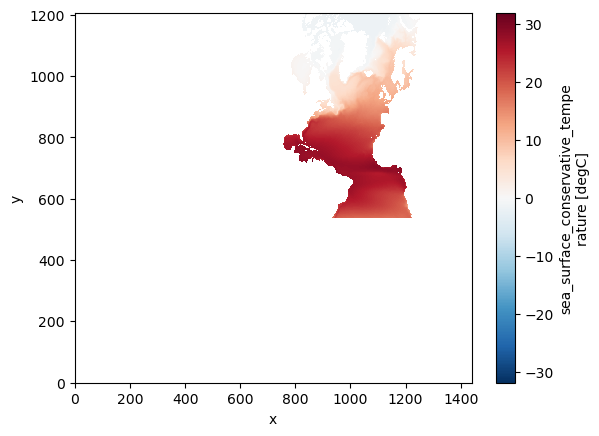

In [18]:
# -- Check Atlantic Ocean mask -- #
ds_tos_con['tos_con'].mean(dim='time_counter').where(ds_domain_cfg['atlmsk']).plot(cmap='RdBu_r')

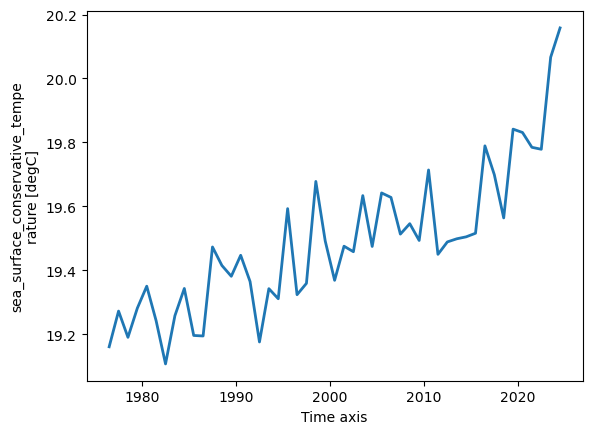

In [19]:
# -- Plotting the annual area-weighted mean Sea Surface Temperature (SST) -- #
# Calculate the area of each grid cell using the e1t and e2t variables (grid cell scale factors).
areacello = ds_domain_cfg['e1t'] * ds_domain_cfg['e2t']

(ds_tos_con['tos_con']
 # Apply Atlantic Ocean mask.
 .where(ds_domain_cfg['atlmsk'])
 # Apply area-weighting.
 .weighted(areacello)
 # Compute the mean over x and y dimensions.
 .mean(dim=['x', 'y'])
 # Plot the resulting time series.
 .plot(lw=2)
 )

##### **Solution: Exercise 2.**

In [20]:
# -- Opening datasets for eORCA025 ERA5v1 -- #
# Opening domain_cfg data for eORCA025 ERA5v1:
ds_domain_cfg = catalog.open_dataset(id='noc-npd-era5/npd-eorca025-era5v1/gn/domain/domain_cfg')

# Opening Sea Ice Concentration (SIC; siconc) data for eORCA025 ERA5v1:
ds_siconc = catalog.open_dataset(id='noc-npd-era5/npd-eorca025-era5v1/gn/I1m_3d',
                                  variable_names=['siconc'],
                                  )
ds_siconc

  2026-01-16T13:17:31.202790Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorError { kind: Timeout, source: hyper_util::client::legacy::Error(Connect, HttpTimeoutError { kind: "HTTP connect", duration: 1s }), connection: Unknown } }) }))
    at /Users/runner/miniforge3/conda-bld/icechunk_1767037408716/_build_env/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/aws-config-1.8.12/src/imds/region.rs:66

  2026-01-16T13:17:33.301086Z  WARN aws_config::imds::region: failed to load region from IMDS, err: failed to load IMDS session token: dispatch failure: timeout: client error (Connect): HTTP connect timeout occurred after 1s: timed out (FailedToLoadToken(FailedToLoadToken { source: DispatchFailure(DispatchFailure { source: ConnectorE

<xarray.Dataset> Size: 4GB
Dimensions:        (time_counter: 595, y: 1206, x: 1440)
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 5kB 1976-01-16T12:00:00 ... ...
    nav_lat        (y, x) float64 14MB dask.array<chunksize=(1206, 1440), meta=np.ndarray>
    nav_lon        (y, x) float64 14MB dask.array<chunksize=(1206, 1440), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    siconc         (time_counter, y, x) float32 4GB dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>

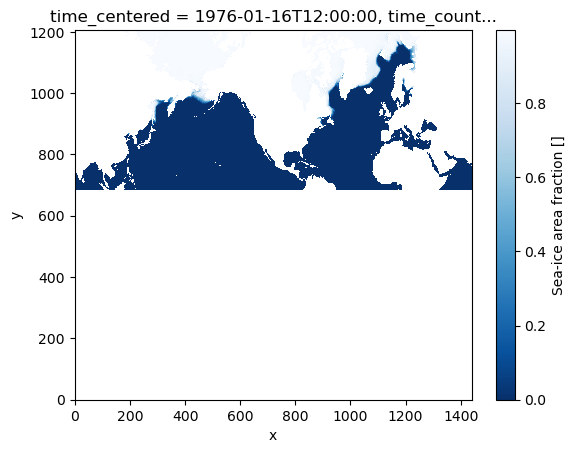

In [21]:
# -- Define Northern Hemisphere mask -- #
# Define mask for Northern Hemisphere T-points using the gphit (latitude) variable.
NH_mask = ds_domain_cfg['gphit'] > 0
ds_siconc['siconc'].isel(time_counter=0).where(NH_mask).plot(cmap='Blues_r')

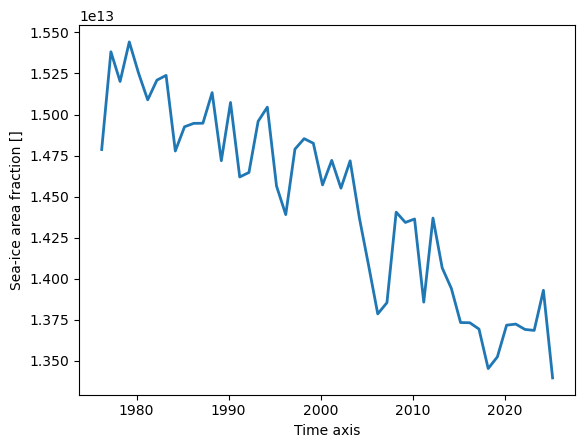

In [22]:
# -- Plotting the March Northern Hemisphere Sea Ice Area -- #
# Calculate the area of each grid cell using the e1t and e2t variables (grid cell scale factors).
areacello = ds_domain_cfg['e1t'] * ds_domain_cfg['e2t']

(ds_siconc['siconc']
 # Select only March sea ice concentration data.
 .sel(time_counter=ds_siconc['time_counter'].dt.month.isin([3]))
 # Apply Northern Hemisphere mask.
 .where(NH_mask & ds_domain_cfg['tmaskutil'])
 # Apply area-weighting.
 .weighted(areacello)
 # Compute the total sea ice area by summing over x and y dimensions.
 .sum(dim=['x', 'y'])
 # Plot the resulting time series.
 .plot(lw=2)
 )